Read data: Select only request data of department "DPW - Street Maintenance"

In [84]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [85]:
data = pd.read_csv('DPW_data_r3y.csv')
data.head()

,_id,group_id,num_requests,parent_closed,status_name,status_code,dept,request_type_name,request_type_id,create_date_et,create_date_utc,last_action_et,last_action_utc,closed_date_et,closed_date_utc,origin,street,cross_street,street_id,cross_street_id,city,neighborhood,census_tract,council_district,ward,police_zone,latitude,longitude,geo_accuracy,date
0,1,827262,1,f,open,0,DPW - Administration,Park Shelter,543,2024-03-12 10:50:00,2024-03-12T14:50:00,2024-03-12 10:50:00,2024-03-12T14:50:00,NaN,NaN,Call Center,NaN,NaN,NaN,NaN,Pittsburgh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NULL_COORDINATES,2024-03-12
1,2,720661,1,f,open,0,DPW - Administration,Park Shelter,543,2023-03-20 07:52:00,2023-03-20T11:52:00,2023-03-20 07:52:00,2023-03-20T11:52:00,NaN,NaN,Call Center,NaN,NaN,NaN,NaN,Pittsburgh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NULL_COORDINATES,2023-03-20
2,3,722010,1,f,open,0,DPW - Administration,Park Shelter,543,2023-03-24 07:44:00,2023-03-24T11:44:00,2023-03-24 07:44:00,2023-03-24T11:44:00,NaN,NaN,Call Center,NaN,NaN,NaN,NaN,Pittsburgh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NULL_COORDINATES,2023-03-24
3,4,846915,1,f,open,0,Police - Zones 1-6,Illegal Parking,417,2024-05-19 12:24:00,2024-05-19T16:24:00,2024-05-19 12:24:00,2024-05-19T16:24:00,NaN,NaN,Website,NaN,NaN,NaN,NaN,Pittsburgh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NULL_COORDINATES,2024-05-19
4,5,853708,1,f,open,0,DPW - Facilities,City Facility,375,2024-06-06 23:04:00,2024-06-07T03:04:00,2024-06-06 23:04:00,2024-06-07T03:04:00,NaN,NaN,Website,NaN,NaN,NaN,NaN,Pittsburgh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NULL_COORDINATES,2024-06-06


In [86]:
dpw_sm = data[data['dept'] == 'DPW - Street Maintenance']
dpw_sm.head()

,_id,group_id,num_requests,parent_closed,status_name,status_code,dept,request_type_name,request_type_id,create_date_et,create_date_utc,last_action_et,last_action_utc,closed_date_et,closed_date_utc,origin,street,cross_street,street_id,cross_street_id,city,neighborhood,census_tract,council_district,ward,police_zone,latitude,longitude,geo_accuracy,date
55,65,755693,1,f,in progress,3,DPW - Street Maintenance,"Litter, Public Property",831,2023-07-08 11:38:00,2023-07-08T15:38:00,2023-07-10 11:31:00,2023-07-10T15:31:00,NaN,NaN,Website,NaN,NaN,NaN,NaN,Pittsburgh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NULL_COORDINATES,2023-07-08
74,86,880597,1,t,closed,1,DPW - Street Maintenance,Trail Maintenance,541,2024-08-28 08:23:00,2024-08-28T12:23:00,2024-12-26 12:45:00,2024-12-26T17:45:00,2024-12-26T12:45:00,2024-12-26T17:45:00,Call Center,NaN,NaN,NaN,NaN,Pittsburgh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NULL_COORDINATES,2024-08-28
147,177,882900,1,t,closed,1,DPW - Street Maintenance,Street Cleaning/Sweeping,317,2024-09-05 09:41:00,2024-09-05T13:41:00,2024-09-27 06:35:00,2024-09-27T10:35:00,2024-09-27T06:35:00,2024-09-27T10:35:00,Call Center,NaN,NaN,NaN,NaN,Pittsburgh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NULL_COORDINATES,2024-09-05
380,454,873480,1,t,closed,1,DPW - Street Maintenance,Trail Maintenance,541,2024-08-06 11:35:00,2024-08-06T15:35:00,2024-12-26 12:51:00,2024-12-26T17:51:00,2024-12-26T12:51:00,2024-12-26T17:51:00,Call Center,NaN,NaN,NaN,NaN,Pittsburgh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NULL_COORDINATES,2024-08-06
560,669,738943,1,f,open,0,DPW - Street Maintenance,"Litter, Public Property",831,2023-05-22 10:12:00,2023-05-22T14:12:00,2023-05-22 10:12:00,2023-05-22T14:12:00,NaN,NaN,Website,NaN,NaN,0.0,0.0,Pittsburgh,NaN,4.200398e+10,6.0,NaN,NaN,40.446306,-80.027041,EXACT,2023-05-22


In [87]:
# Check duplicated data
dups = dpw_sm.duplicated()
dups.any()

False

### Part 1. Predict resolution time for each request type

#### 1. Check and select requests that are already closed

In [88]:
# Check the count and percentage of status_name = 'closed' requests
status_counts = dpw_sm['status_name'].value_counts()
print(status_counts)
closed_pct = status_counts['closed'] / status_counts.sum()
print(f"Percentage of 'closed': {closed_pct:.2%}")


status_name
closed         37111
in progress     1187
open             782
on hold           10
Name: count, dtype: int64
Percentage of 'closed': 94.94%


In [89]:
# Select only status == "closed" requests for training and testing the model
sm_closed = dpw_sm[dpw_sm['status_name'] == 'closed'].copy()
sm_closed.shape[0]

37111

In [90]:
sm_closed.columns

Index(['_id', 'group_id', 'num_requests', 'parent_closed', 'status_name',
       'status_code', 'dept', 'request_type_name', 'request_type_id',
       'create_date_et', 'create_date_utc', 'last_action_et',
       'last_action_utc', 'closed_date_et', 'closed_date_utc', 'origin',
       'street', 'cross_street', 'street_id', 'cross_street_id', 'city',
       'neighborhood', 'census_tract', 'council_district', 'ward',
       'police_zone', 'latitude', 'longitude', 'geo_accuracy', 'date'],
      dtype='object')

#### 2. Creating Y-label: Resolution time (hr)

In [91]:
# y-label: calculate resolution time (in mins)
print(sm_closed['create_date_et'].dtype, sm_closed['closed_date_et'].dtype)

# Parse datetime and create resolution time
sm_closed['create_date'] = pd.to_datetime(sm_closed['create_date_et'], errors='coerce')
sm_closed['closed_date'] = pd.to_datetime(sm_closed['closed_date_et'], errors='coerce')
print(sm_closed[['create_date', 'closed_date']].isnull().sum())


object object
create_date    0
closed_date    0
dtype: int64


In [92]:
sm_closed['resolution_time_hr'] = (sm_closed['closed_date'] - sm_closed['create_date']).dt.total_seconds() / 3600
sm_closed.head()

,_id,group_id,num_requests,parent_closed,status_name,status_code,dept,request_type_name,request_type_id,create_date_et,create_date_utc,last_action_et,last_action_utc,closed_date_et,closed_date_utc,origin,street,cross_street,street_id,cross_street_id,city,neighborhood,census_tract,council_district,ward,police_zone,latitude,longitude,geo_accuracy,date,create_date,closed_date,resolution_time_hr
74,86,880597,1,t,closed,1,DPW - Street Maintenance,Trail Maintenance,541,2024-08-28 08:23:00,2024-08-28T12:23:00,2024-12-26 12:45:00,2024-12-26T17:45:00,2024-12-26T12:45:00,2024-12-26T17:45:00,Call Center,NaN,NaN,NaN,NaN,Pittsburgh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NULL_COORDINATES,2024-08-28,2024-08-28 08:23:00,2024-12-26 12:45:00,2884.366667
147,177,882900,1,t,closed,1,DPW - Street Maintenance,Street Cleaning/Sweeping,317,2024-09-05 09:41:00,2024-09-05T13:41:00,2024-09-27 06:35:00,2024-09-27T10:35:00,2024-09-27T06:35:00,2024-09-27T10:35:00,Call Center,NaN,NaN,NaN,NaN,Pittsburgh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NULL_COORDINATES,2024-09-05,2024-09-05 09:41:00,2024-09-27 06:35:00,524.900000
380,454,873480,1,t,closed,1,DPW - Street Maintenance,Trail Maintenance,541,2024-08-06 11:35:00,2024-08-06T15:35:00,2024-12-26 12:51:00,2024-12-26T17:51:00,2024-12-26T12:51:00,2024-12-26T17:51:00,Call Center,NaN,NaN,NaN,NaN,Pittsburgh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NULL_COORDINATES,2024-08-06,2024-08-06 11:35:00,2024-12-26 12:51:00,3409.266667
853,1023,885954,1,t,closed,1,DPW - Street Maintenance,Street Obstruction/Closure,26739,2024-09-16 11:37:00,2024-09-16T15:37:00,2024-09-25 07:02:00,2024-09-25T11:02:00,2024-09-25T07:02:00,2024-09-25T11:02:00,Website,NaN,NaN,NaN,NaN,Pittsburgh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NULL_COORDINATES,2024-09-16,2024-09-16 11:37:00,2024-09-25 07:02:00,211.416667
1031,1238,869173,1,t,closed,1,DPW - Street Maintenance,"Litter, Public Property",831,2024-07-23 16:34:00,2024-07-23T20:34:00,2024-09-25 09:36:00,2024-09-25T13:36:00,2024-09-25T09:36:00,2024-09-25T13:36:00,Website,NaN,NaN,NaN,NaN,Pittsburgh,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NULL_COORDINATES,2024-07-23,2024-07-23 16:34:00,2024-09-25 09:36:00,1529.033333


#### 3. Remove Unnecessary Columns

In [93]:
# Check current columns in the dataframe
sm_closed.columns

Index(['_id', 'group_id', 'num_requests', 'parent_closed', 'status_name',
       'status_code', 'dept', 'request_type_name', 'request_type_id',
       'create_date_et', 'create_date_utc', 'last_action_et',
       'last_action_utc', 'closed_date_et', 'closed_date_utc', 'origin',
       'street', 'cross_street', 'street_id', 'cross_street_id', 'city',
       'neighborhood', 'census_tract', 'council_district', 'ward',
       'police_zone', 'latitude', 'longitude', 'geo_accuracy', 'date',
       'create_date', 'closed_date', 'resolution_time_hr'],
      dtype='object')

In [94]:
# Remove unecessary data (duplicate information or filtered columns)
cols_to_drop = [
    '_id', 'parent_closed','status_name', 'status_code', 'dept', 'request_type_id',
    'create_date_et', 'create_date_utc', 'last_action_et', 'last_action_utc',
    'closed_date_et', 'closed_date_utc', 'street_id', 'cross_street_id', 'date'
]

sm_cleaned = sm_closed.drop(columns=[col for col in cols_to_drop if col in sm_closed.columns])


In [95]:
sm_cleaned.columns

Index(['group_id', 'num_requests', 'request_type_name', 'origin', 'street',
       'cross_street', 'city', 'neighborhood', 'census_tract',
       'council_district', 'ward', 'police_zone', 'latitude', 'longitude',
       'geo_accuracy', 'create_date', 'closed_date', 'resolution_time_hr'],
      dtype='object')

#### 4. Handle Missing Values

In [96]:
# Check missing values (count & percentage) for each column
missing_count = sm_cleaned.isnull().sum()
missing_pct = (sm_cleaned.isnull().mean() * 100).round(2)

missing_df = pd.DataFrame({
    'missing_count': missing_count,
    'missing_percentage': missing_pct
}).sort_values(by='missing_count', ascending=False)

# Columns with missing values > 0
missing_df[missing_df['missing_count'] > 0]

,missing_count,missing_percentage
cross_street,29210,78.71
census_tract,28432,76.61
street,490,1.32
neighborhood,288,0.78
police_zone,283,0.76
ward,269,0.72
council_district,227,0.61
latitude,170,0.46
longitude,170,0.46


In [97]:
# Drop top 2 columns with the most missing values (too sparse)
cols_to_drop = ['cross_street', 'census_tract']
sm_cleaned = sm_cleaned.drop(columns=[col for col in cols_to_drop if col in sm_cleaned.columns])


In [98]:
# Drop rows with missing values (small percentage)
sm_cleaned = sm_cleaned.dropna()
sm_cleaned.shape

(36528, 16)

In [99]:
sm_cleaned['request_type_name'].value_counts().loc[['Potholes (DO NOT USE)', 'Snow/Ice Removal (DO NOT USE)']]

request_type_name
Potholes (DO NOT USE)            8
Snow/Ice Removal (DO NOT USE)    4
Name: count, dtype: int64

In [100]:
# Drop request types (e.g. 'Potholes (DO NOT USE)' and 'Snow/Ice Removal (DO NOT USE)')
sm_cleaned = sm_cleaned[~sm_cleaned['request_type_name'].isin(['Potholes (DO NOT USE)', 'Snow/Ice Removal (DO NOT USE)'])]
sm_cleaned.shape

(36516, 16)

In [101]:
sm_cleaned.head()

,group_id,num_requests,request_type_name,origin,street,city,neighborhood,council_district,ward,police_zone,latitude,longitude,geo_accuracy,create_date,closed_date,resolution_time_hr
2867,651240,1,Public Right of Way,Control Panel,HIGH ST,Pittsburgh,Spring Garden,1.0,24.0,1.0,40.461200,-79.989511,EXACT,2022-06-30 14:45:00,2024-10-31 10:02:00,20491.283333
4522,623904,1,Overgrowth,Call Center,BAYTREE ST,Pittsburgh,Perry North,1.0,26.0,1.0,40.488343,-80.013614,EXACT,2022-04-13 12:23:00,2024-11-26 10:28:00,22990.083333
4688,639650,1,Overgrowth,Call Center,BOGGSTON AVE,Pittsburgh,Beltzhoover,3.0,18.0,3.0,40.418495,-80.009478,EXACT,2022-06-01 10:32:00,2025-02-28 06:26:00,24067.900000
5186,658409,1,Overgrowth,Call Center,HIGHLAND DR,Pittsburgh,Lincoln-Lemington-Belmar,9.0,12.0,5.0,40.478380,-79.899982,EXACT,2022-07-22 15:51:00,2025-03-17 13:02:00,23253.183333
6666,871974,1,Trail Maintenance,Report2Gov Website,E Ohio St,Pittsburgh,Troy Hill,1.0,24.0,1.0,40.458903,-79.985800,EXACT,2024-08-01 09:31:00,2024-09-21 12:10:00,1226.650000


In [102]:
# Add year and week columns
sm_cleaned['year'] = sm_cleaned['create_date'].dt.isocalendar().year
sm_cleaned['week'] = sm_cleaned['create_date'].dt.isocalendar().week

#### 5. Train / Test Data Split       
      Train: 2022/04 ~ 2024/03   
      Test: 2024/04 ~ 2025/03   

In [103]:
# Split the training and testing data based on the create_date
train_mask = (sm_cleaned['create_date'] >= '2022-04-01') & (sm_cleaned['create_date'] <= '2024-03-31')
test_mask = (sm_cleaned['create_date'] >= '2024-04-01') & (sm_cleaned['create_date'] <= '2025-03-31')
train_data = sm_cleaned[train_mask]
test_data = sm_cleaned[test_mask]
print('Size of training dataset:',len(train_data), ' | Size of testing dataset:',len(test_data))
print('Train(%) =', len(train_data) / (len(train_data) + len(test_data)) * 100)
print('Test(%) =', len(test_data) / (len(train_data) + len(test_data)) * 100)

Size of training dataset: 24538  | Size of testing dataset: 11923
Train(%) = 67.2993061078961
Test(%) = 32.70069389210389


In [104]:
train_data.columns

Index(['group_id', 'num_requests', 'request_type_name', 'origin', 'street',
       'city', 'neighborhood', 'council_district', 'ward', 'police_zone',
       'latitude', 'longitude', 'geo_accuracy', 'create_date', 'closed_date',
       'resolution_time_hr', 'year', 'week'],
      dtype='object')

In [105]:
train_agg = train_data.groupby(['year', 'week', 'request_type_name'])['resolution_time_hr'].agg(['count', 'sum']).reset_index()
train_agg.rename(columns={'count': 'resolution_count', 'sum': 'total_resolution_hr'}, inplace=True)

# Grouping by year, week, and type for test
test_agg = test_data.groupby(['year', 'week', 'request_type_name'])['resolution_time_hr'].agg(['count', 'sum']).reset_index()
test_agg.rename(columns={'count': 'resolution_count', 'sum': 'total_resolution_hr'}, inplace=True)


#### 6. Feature Engineering
    a. last_week_resolution_count: the number of that type of request being resolved last month          
    b. last_week_total_resolution_hr: the total resolution time (in hr) of that type of request for last month   

In [106]:
# Create lagged version of train_agg
train_lag = train_agg.copy()
train_lag['week'] += 1  # shift week forward so we can join back on "last week"
train_lag.rename(columns={
    'resolution_count': 'last_week_resolution_count',
    'total_resolution_hr': 'last_week_total_resolution_hr'
}, inplace=True)

# Merge back to train_agg
train_agg = pd.merge(
    train_agg,
    train_lag[['year', 'week', 'request_type_name', 'last_week_resolution_count', 'last_week_total_resolution_hr']],
    how='left',
    on=['year', 'week', 'request_type_name']
)

# Same for test_agg
test_lag = test_agg.copy()
test_lag['week'] += 1
test_lag.rename(columns={
    'resolution_count': 'last_week_resolution_count',
    'total_resolution_hr': 'last_week_total_resolution_hr'
}, inplace=True)

test_agg = pd.merge(
    test_agg,
    test_lag[['year', 'week', 'request_type_name', 'last_week_resolution_count', 'last_week_total_resolution_hr']],
    how='left',
    on=['year', 'week', 'request_type_name']
)

In [107]:
train_agg.fillna(0, inplace=True)
test_agg.fillna(0, inplace=True)

In [108]:
# train_agg.sort_values(by=['request_type_name', 'year', 'week'])
# print(train_agg.isna().sum())
# print(test_agg.isna().sum())

In [109]:
train_agg.head()

,year,week,request_type_name,resolution_count,total_resolution_hr,last_week_resolution_count,last_week_total_resolution_hr
0,2022,13,Drainage/Leak,1,4.766667,0.0,0.0
1,2022,13,Leaves/Street Cleaning,2,581.233333,0.0,0.0
2,2022,13,"Litter, Public Property",9,2027.733333,0.0,0.0
3,2022,13,Overgrowth,1,1748.716667,0.0,0.0
4,2022,13,Potholes,48,18223.683333,0.0,0.0


#### Model Training

In [110]:
from sklearn.metrics import root_mean_squared_error
features = ['request_type_name', 'week', 'last_week_resolution_count','last_week_total_resolution_hr']
target = 'total_resolution_hr'

# Split the data into training and testing sets
X_train = train_agg[features]
y_train = train_agg[target]
X_test = test_agg[features]
y_test = test_agg[target]

# Preprocessing + modeling pipeline
categorical = ['request_type_name', 'week'] # 'street'
numerical = ['last_week_resolution_count','last_week_total_resolution_hr']

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore', drop = 'first'), categorical),
        ('num', StandardScaler(), numerical)
    ]
)

models = {
    "RandomForestRegressor": RandomForestRegressor(random_state=42, n_estimators=100),
    "LinearRegression": LinearRegression(),
    "GradientBoostingRegressor": GradientBoostingRegressor(random_state=42),
    "SVR": SVR()
}
results = {}
for model_name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
    results[model_name] = {"MAE": mae, "RMSE": rmse}
    #print(f"{model_name}: MAE = {metrics['MAE']:.2f} hours, RMSE = {metrics['RMSE']:.2f} hours")

# Print results
for model_name, metrics in results.items():
    print(f"{model_name}: MAE = {metrics['MAE']:.2f} hours, RMSE = {metrics['RMSE']:.2f} hours")
    

RandomForestRegressor: MAE = 3012.46 hours, RMSE = 6582.62 hours
LinearRegression: MAE = 3271.11 hours, RMSE = 6172.66 hours
GradientBoostingRegressor: MAE = 3174.88 hours, RMSE = 6664.48 hours
SVR: MAE = 3202.03 hours, RMSE = 7795.10 hours


/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [111]:
from sklearn.model_selection import GridSearchCV
# Your parameter grids
param_grids = {
    "RandomForestRegressor": {
        "model__n_estimators": [50, 100],
        "model__max_depth": [None, 10, 20]
    },
    "LinearRegression": {},  # No hyperparameters to tune for basic LinearRegression
    "GradientBoostingRegressor": {
        "model__n_estimators": [50, 100],
        "model__learning_rate": [0.05, 0.1],
        "model__max_depth": [3, 5]
    },
    "SVR": {
        "model__C": [0.1, 1, 10],
        "model__epsilon": [0.1, 0.2]
    }
}

results = {}
fitted_models = {}

for model_name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    param_grid = param_grids.get(model_name, {})
    
    if param_grid:
        grid_search = GridSearchCV(
            pipeline,
            param_grid,
            cv=5,
            scoring='neg_root_mean_squared_error',
            n_jobs=-1
        )
        grid_search.fit(X_train, y_train)
        best_model = grid_search.best_estimator_
        best_params = grid_search.best_params_
    else:
        pipeline.fit(X_train, y_train)
        best_model = pipeline
        best_params = "Default parameters"

    y_pred = best_model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)

    results[model_name] = {
        "MAE": mae,
        "RMSE": rmse,
        "Best Parameters": best_params
    }
    fitted_models[model_name] = best_model

# Print results
for model_name, metrics in results.items():
    print(f"{model_name}:")
    print(f"  MAE = {metrics['MAE']:.2f} hours")
    print(f"  RMSE = {metrics['RMSE']:.2f} hours")
    print(f"  Best Parameters: {metrics['Best Parameters']}\n")


/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning:

RandomForestRegressor:
  MAE = 3052.20 hours
  RMSE = 6605.74 hours
  Best Parameters: {'model__max_depth': 10, 'model__n_estimators': 50}

LinearRegression:
  MAE = 3271.11 hours
  RMSE = 6172.66 hours
  Best Parameters: Default parameters

GradientBoostingRegressor:
  MAE = 3133.26 hours
  RMSE = 6543.01 hours
  Best Parameters: {'model__learning_rate': 0.05, 'model__max_depth': 3, 'model__n_estimators': 100}

SVR:
  MAE = 3036.94 hours
  RMSE = 7617.98 hours
  Best Parameters: {'model__C': 10, 'model__epsilon': 0.2}



/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [112]:
# If you want to use the best model for further prediction:
best_model = fitted_models['RandomForestRegressor']
y_pred = best_model.predict(X_test)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [113]:
best_model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['request_type_name',
                                                   'week']),
                                                 ('num', StandardScaler(),
                                                  ['last_week_resolution_count',
                                                   'last_week_total_resolution_hr'])])),
                ('model',
                 RandomForestRegressor(max_depth=10, n_estimators=50,
                                       random_state=42))])

#### Baseline Model
We take the average of total_resolution_hr by type in the training dataset, and use it to predict

In [114]:
train_agg.head()

,year,week,request_type_name,resolution_count,total_resolution_hr,last_week_resolution_count,last_week_total_resolution_hr
0,2022,13,Drainage/Leak,1,4.766667,0.0,0.0
1,2022,13,Leaves/Street Cleaning,2,581.233333,0.0,0.0
2,2022,13,"Litter, Public Property",9,2027.733333,0.0,0.0
3,2022,13,Overgrowth,1,1748.716667,0.0,0.0
4,2022,13,Potholes,48,18223.683333,0.0,0.0


In [115]:
avg_resolution_by_type = (
    train_agg.groupby('request_type_name')['total_resolution_hr']
    .mean()
    .reset_index()
    .rename(columns={'total_resolution_hr': 'baseline_pred'})
)

In [116]:
# Merge average resolution time by type into test_agg
result = test_agg.copy()
result = result.merge(
    avg_resolution_by_type,
    how='left',
    on='request_type_name'
)


In [118]:
# result.isna().sum() # 46
result.fillna(0, inplace=True)
result.head()


,year,week,request_type_name,resolution_count,total_resolution_hr,last_week_resolution_count,last_week_total_resolution_hr,baseline_pred
0,2024,14,Angle Iron,3,2238.033333,0.0,0.0,1391.592995
1,2024,14,Barricades,5,1378.066667,0.0,0.0,1228.775421
2,2024,14,"City Steps, Need Cleared",1,813.300000,0.0,0.0,4912.186232
3,2024,14,Curb/Request for Asphalt Windrow,10,14476.616667,0.0,0.0,2679.642361
4,2024,14,Drainage/Leak,7,408.833333,0.0,0.0,1741.612298


In [119]:
result['model_pred'] = best_model.predict(result[features])
result.head()

/opt/anaconda3/lib/python3.12/site-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


,year,week,request_type_name,resolution_count,total_resolution_hr,last_week_resolution_count,last_week_total_resolution_hr,baseline_pred,model_pred
0,2024,14,Angle Iron,3,2238.033333,0.0,0.0,1391.592995,4161.288204
1,2024,14,Barricades,5,1378.066667,0.0,0.0,1228.775421,8916.583358
2,2024,14,"City Steps, Need Cleared",1,813.300000,0.0,0.0,4912.186232,6774.162002
3,2024,14,Curb/Request for Asphalt Windrow,10,14476.616667,0.0,0.0,2679.642361,3917.694181
4,2024,14,Drainage/Leak,7,408.833333,0.0,0.0,1741.612298,4050.563538


#### Evaluation: Comparing Model to Baseline

Baseline's MAE and RMSE: (5217.490141830388, 9639.376642432342)
Model's MAE and RMSE: (3052.1963530142775, 6605.744373620048)


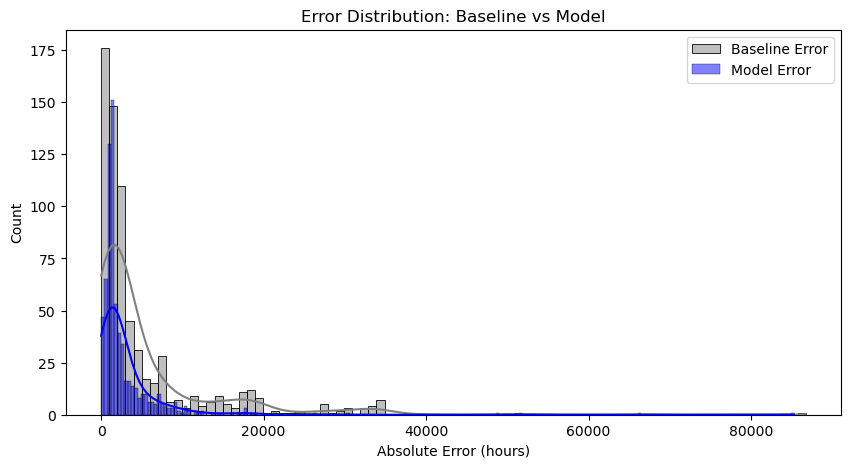

In [125]:
# Calculate absolute errors
result['baseline_error'] = abs(result['baseline_pred'] - result['total_resolution_hr'])
result['model_error'] = abs(result['model_pred'] - result['total_resolution_hr'])

from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate overall MAE and RMSE
mae_baseline = mean_absolute_error(result['total_resolution_hr'], result['baseline_pred'])
rmse_baseline = np.sqrt(mean_squared_error(result['total_resolution_hr'], result['baseline_pred']))

mae_model = mean_absolute_error(result['total_resolution_hr'], result['model_pred'])
rmse_model = np.sqrt(mean_squared_error(result['total_resolution_hr'], result['model_pred']))

print(f'Baseline\'s MAE and RMSE: {(mae_baseline, rmse_baseline)}')
print(f'Model\'s MAE and RMSE: {(mae_model, rmse_model)}')


# Plot
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,5))
sns.histplot(result['baseline_error'], color='gray', label='Baseline Error', kde=True)
sns.histplot(result['model_error'], color='blue', label='Model Error', kde=True)
plt.xlabel('Absolute Error (hours)')
plt.title('Error Distribution: Baseline vs Model')
plt.legend()
plt.show()

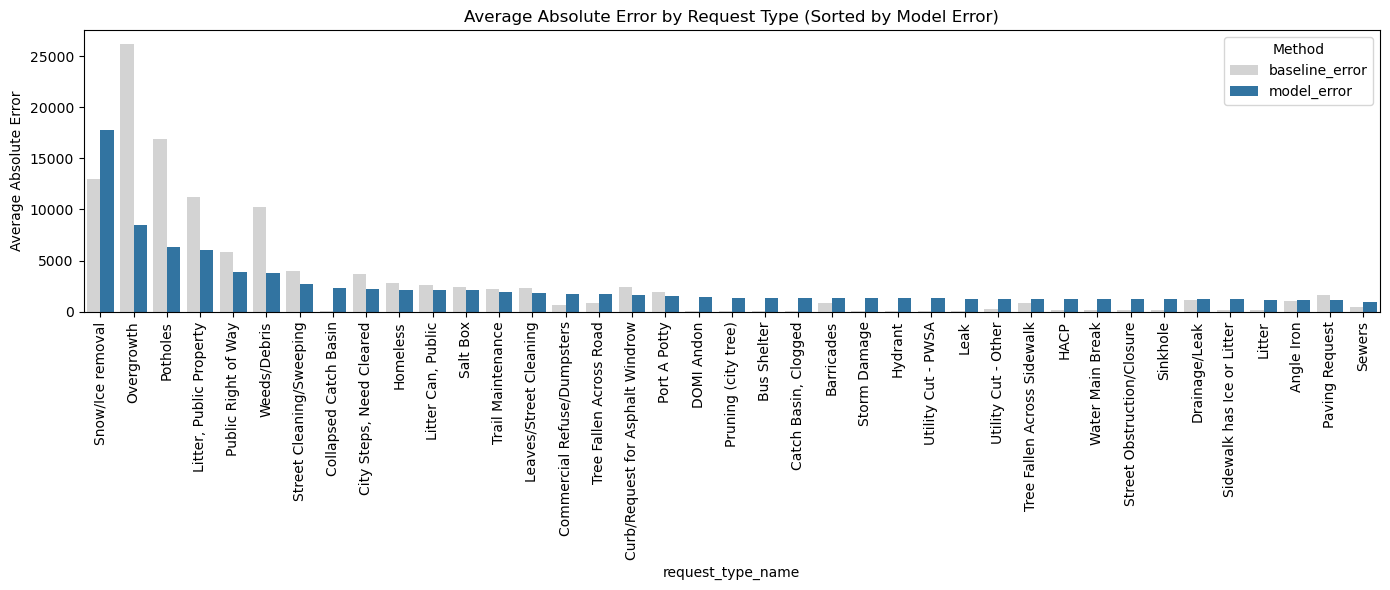

In [129]:
# Aggregate error by request_type_name
grouped_errors = (
    result
    .groupby('request_type_name')[['baseline_error', 'model_error']]
    .mean()
    .reset_index()
)

# Rank the data by model's error
grouped_errors = grouped_errors.sort_values('model_error', ascending=False)

melted = grouped_errors.melt(
    id_vars='request_type_name',
    value_vars=['baseline_error', 'model_error'],
    var_name='Method',
    value_name='Average Absolute Error'
)

# Plotting bar chart
plt.figure(figsize=(14, 6))
sns.barplot(data=melted, x='request_type_name', y='Average Absolute Error', hue='Method', palette={'baseline_error': 'lightgray', 'model_error': '#1f77b4'})
plt.xticks(rotation=90)
plt.title('Average Absolute Error by Request Type (Sorted by Model Error)')
plt.tight_layout()
plt.show()


In [127]:
result.tail()

,year,week,request_type_name,resolution_count,total_resolution_hr,last_week_resolution_count,last_week_total_resolution_hr,baseline_pred,model_pred,baseline_error,model_error
683,2025,5,Snow/Ice removal,67,2172.866667,1243.0,90454.166667,3718.366667,87449.196633,1545.500000,85276.329967
684,2025,5,Street Cleaning/Sweeping,3,159.016667,0.0,0.000000,7480.465873,1359.285657,7321.449206,1200.268990
685,2025,5,Trail Maintenance,1,7.650000,2.0,115.850000,2531.736747,1700.487279,2524.086747,1692.837279
686,2025,5,Tree Fallen Across Sidewalk,1,23.816667,2.0,166.766667,1207.384659,1326.591958,1183.567992,1302.775292
687,2025,5,Water Main Break,1,80.733333,3.0,279.900000,0.000000,1346.763204,80.733333,1266.029871
